In [90]:
import numpy as np
from PIL import Image
import glob
import pickle
import matplotlib.pyplot as plt
filelist = glob.glob('/home/maf3r/nnproject/geoguessr/data/new/*.jpg')

In [91]:
x_train = np.array([np.array(Image.open(fname)) for fname in filelist])

In [92]:
print(x_train.shape)

(1560, 200, 400, 3)


In [93]:
pickle.dump(x_train,open("x_train.pickle","wb"))

In [94]:
y = pickle.load(open("/home/maf3r/nnproject/x_train.pickle","rb"))

In [95]:
print(y.shape)

(1560, 200, 400, 3)


In [96]:
x = 194

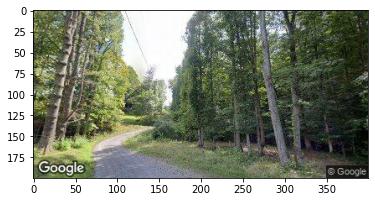

In [97]:
plt.imshow(x_train[x])

In [98]:
y_train = []
for i in range(1560):
    y_train.append(i // 24)
y_train = np.array(y_train)

In [99]:
filelist = glob.glob('/home/maf3r/nnproject/geoguessr/data/testing_data/*.jpg')

In [100]:
x_test = np.array([np.array(Image.open(fname)) for fname in sorted(filelist)])

In [101]:
print(x_test.shape)

(390, 200, 400, 3)


In [102]:
pickle.dump(x_train,open("x_test.pickle","wb"))

In [103]:
y = pickle.load(open("/home/maf3r/nnproject/x_test.pickle","rb"))

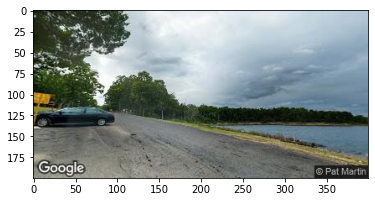

In [104]:
plt.imshow(x_test[x])

In [105]:
y_test = []
for j in range(390):
    y_test.append(j // 6)
y_test = np.array(y_test)

In [106]:
print(y_test)

[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15
 16 16 16 16 16 16 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19 19
 20 20 20 20 20 20 21 21 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23
 24 24 24 24 24 24 25 25 25 25 25 25 26 26 26 26 26 26 27 27 27 27 27 27
 28 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30 30 30 31 31 31 31 31 31
 32 32 32 32 32 32 33 33 33 33 33 33 34 34 34 34 34 34 35 35 35 35 35 35
 36 36 36 36 36 36 37 37 37 37 37 37 38 38 38 38 38 38 39 39 39 39 39 39
 40 40 40 40 40 40 41 41 41 41 41 41 42 42 42 42 42 42 43 43 43 43 43 43
 44 44 44 44 44 44 45 45 45 45 45 45 46 46 46 46 46 46 47 47 47 47 47 47
 48 48 48 48 48 48 49 49 49 49 49 49 50 50 50 50 50 50 51 51 51 51 51 51
 52 52 52 52 52 52 53 53 53 53 53 53 54 54 54 54 54

In [107]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import tensorflow as tf

In [108]:
#convnet = tf.keras.Sequential()
x = keras.layers.Input(x_train.shape[1:])
y = x
y = keras.layers.Conv2D(4, kernel_size=(64,64), activation='relu')(y)
y = keras.layers.Conv2D(8, kernel_size=(64,64), activation='relu')(y)
y = keras.layers.MaxPool2D(pool_size=(2,2))(y)
y = keras.layers.Dropout(0.25)(y)
y = keras.layers.Flatten()(y)
y = keras.layers.Dense(4, activation='relu')(y)
y = keras.layers.Dropout(0.5)(y)
# Output Logits (10)
y = keras.layers.Dense(len(np.unique(y_train)))(y)
model = keras.Model(x,y)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer=keras.optimizers.Adam(),
metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [109]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 200, 400, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 137, 337, 4)       49156     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 274, 8)        131080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 137, 8)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 37, 137, 8)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 40552)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 1622

In [34]:
data_generator = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=False)
split_point = 1248 # 80%/20%
dg_trainer = data_generator.flow(x_train[:split_point],
                                 y_train[:split_point],
                                 batch_size=256)

In [35]:
epochs = 1
history = model.fit(dg_trainer,
                    epochs=epochs,
                    verbose=1,
                    validation_data = (x_train[split_point:],
                                       y_train[split_point:]))

2022-04-30 04:12:18.433530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


5/5 [==============================] - ETA: 0s - loss: 10.9803 - sparse_categorical_accuracy: 0.0152   

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [36]:
pickle.dump(model,open("model.pickle","wb"))

TypeError: cannot pickle 'weakref' object